In [3]:
import pandas as pd
import seaborn
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [10]:
input_data = pd.read_csv("boat_labeled.csv", encoding= 'unicode_escape')

In [11]:
########### Importing & Preparing data #########


input_data = input_data.drop('url', axis='columns')
input_data.title = input_data.title.astype(str)
input_data.desc = input_data.desc.astype(str)
input_data.label = input_data.label.astype(str)
input_text = []
for i in range(0, len(input_data.label)):
    desc = input_data.desc[i].split('{"@context":')
    input_text.append(input_data.title[i] + " " + desc[0])
input_data.insert(0, 'text', input_text)


In [135]:
####### Function for Pie-chart based EDA ######
def pie_spam(list_spam):
    count_spam = 0
    for i in list_spam:
        if i == 'Spam':
            count_spam += 1
        else:
            pass
    count_Non_spam = len(list_spam) - count_spam
    fig_data = [count_spam, count_Non_spam]
    fig_label = ["Spam", "Non-Spam"]
    fig_explode = [0.1, 0]
    fig_color = ['#5499C7','#1B4F72']
    fig1, ax1 = plt.subplots()
    ax1.pie(fig_data, labels=fig_label, colors=fig_color,  explode=fig_explode, autopct='%1.1f%%', startangle=110)
    plt.tight_layout()
    plt.show()
    plt.savefig(f"spam_pie.png")

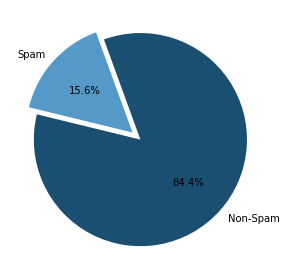

<Figure size 432x288 with 0 Axes>

In [136]:
######## Data Pre-processing #######
label = input_data.label.tolist()
pie_spam(label) # 15.6% spam 84.4% Non-Spam
stemmer = WordNetLemmatizer()
def preprocess(document):
    document = document.lower()
    words = nltk.word_tokenize(document)
    words = [stemmer.lemmatize(word) for word in words if word.isalpha()]
    words = [word for word in words if word not in stopwords.words("english")]
    sentence = " ".join(words)
    return sentence
textList = [text for text in input_data.text]
processed_data_texts = [preprocess(text) for text in textList]
df_texts = pd.DataFrame({'label': label, 'text': processed_data_texts})

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/surbhigawande/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
# transform the dataset
import numpy as np
import pandas as pd
#import keras
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from collections import Counter

In [25]:
df_texts

,label,text
0,Non-Spam,sea ray slx ay slx boat owner marine sale
1,Non-Spam,sea ray sundeck ay sundeck boat owner marine sale
2,Non-Spam,crownline l ne l boat owner marine sale
3,Non-Spam,baja boat owner marine sale
4,Non-Spam,four winns horizon nns horizon boat owner mari...
...,...,...
545,Non-Spam,starcraft limited ft limited boat owner marine...
546,Non-Spam,p boat owner marine sale
547,Non-Spam,mastercraft prostar ft prostar boat owner mari...
548,Non-Spam,supra saltare price drop tare price drop boat ...


In [38]:
###### splitting train test data ######
train_x, test_x, train_y, test_y = train_test_split(df_texts.text, df_texts.label, test_size=0.2, random_state=0)
#print(train_x.shape) # (385, 349)
#print(train_y.shape) # (385,)
# type(train_x) # <class 'scipy.sparse.csr.csr_matrix'>

##### TFIDF Vectorization ######
def tk(doc):
    return doc
vec = TfidfVectorizer(analyzer='word', tokenizer=tk, preprocessor=tk, token_pattern=None,
                      min_df=2, ngram_range=(1,2), stop_words='english')
vec.fit(train_x)
train_x = vec.transform(train_x)
test_x = vec.transform(test_x)
#np.array(train_x) # 385x349
smt = SMOTE(sampling_strategy=0.25)
train_x,train_y = smt.fit_resample(train_x,train_y)

/Users/surbhigawande/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [107]:
######## training various NLP Models #######
model = []
# train Naive Bayes
from sklearn.naive_bayes import BernoulliNB
NBmodel = BernoulliNB()
NBmodel.fit(train_x, train_y)
y_pred_NB = NBmodel.predict(test_x)
model.append("Naive Bayes")
print("Naive Bayes:::")
print(classification_report(test_y, y_pred_NB))

Naive Bayes:::
              precision    recall  f1-score   support

    Non-Spam       0.86      0.87      0.86        92
        Spam       0.29      0.28      0.29        18

    accuracy                           0.77       110
   macro avg       0.58      0.57      0.58       110
weighted avg       0.77      0.77      0.77       110



In [42]:
# train Random Forest
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=500, max_depth=6, bootstrap=True, random_state=0,class_weight = 'balanced')  # with 10 trees
RFmodel.fit(train_x, train_y)
y_pred_RF = RFmodel.predict(test_x)
#model.append("Random Forest")
print("Random Forestl:::")
print(classification_report(test_y, y_pred_RF))

Random Forestl:::
              precision    recall  f1-score   support

    Non-Spam       0.88      0.97      0.92        92
        Spam       0.67      0.33      0.44        18

    accuracy                           0.86       110
   macro avg       0.77      0.65      0.68       110
weighted avg       0.85      0.86      0.84       110



In [80]:

# train Linear SVM
from sklearn.svm import LinearSVC
SVMmodel = LinearSVC(random_state = 0, penalty = 'l1', dual = False)
SVMmodel.fit(train_x, train_y)
y_pred_SVM = SVMmodel.predict(test_x)
model.append("SVM")
print("SVM:::")
print(classification_report(test_y, y_pred_SVM))

SVM:::
              precision    recall  f1-score   support

    Non-Spam       0.87      0.98      0.92        92
        Spam       0.67      0.22      0.33        18

    accuracy                           0.85       110
   macro avg       0.77      0.60      0.63       110
weighted avg       0.83      0.85      0.82       110



In [81]:
# train polynomial SVM
from sklearn.svm import SVC 
SVMPmodel = SVC(kernel = 'poly',degree=3, random_state = 0, class_weight = 'balanced', gamma="auto")
SVMPmodel.fit(train_x, train_y)
y_pred_SVMP = SVMPmodel.predict(test_x)
model.append("Polynomial SVM")
print("SVMP:::")
print(classification_report(test_y, y_pred_SVMP))

SVMP:::
              precision    recall  f1-score   support

    Non-Spam       0.88      0.96      0.92        92
        Spam       0.60      0.33      0.43        18

    accuracy                           0.85       110
   macro avg       0.74      0.64      0.67       110
weighted avg       0.83      0.85      0.84       110



In [100]:
# train polynomial SVM
from sklearn.svm import SVC 
SVMPmodel = SVC(C= 100, kernel = 'poly',degree=3, random_state = 0, class_weight = 'balanced', gamma='auto', verbose = 2)
SVMPmodel.fit(train_x, train_y)
y_pred_SVMP = SVMPmodel.predict(test_x)
model.append("Polynomial SVM")
print("SVMP:::")
print(classification_report(test_y, y_pred_SVMP))

[LibSVM]SVMP:::
              precision    recall  f1-score   support

    Non-Spam       0.88      0.96      0.92        92
        Spam       0.60      0.33      0.43        18

    accuracy                           0.85       110
   macro avg       0.74      0.64      0.67       110
weighted avg       0.83      0.85      0.84       110



In [108]:
from sklearn.metrics import precision_score
acc = []
acc_NB = precision_score(test_y, y_pred_NB, pos_label="Spam" )  # evaluate accuracy rate of Naive Bayes model
print("Naive Bayes model Precision:: {:.2f}%".format(acc_NB*100))
acc.append(acc_NB*100)
# acc_logit = precision_score(test_y, y_pred_logit)  # evaluate accuracy rate of Logit model model
# print("Logit model Precision:: {:.2f}%".format(acc_logit*100))
# acc.append(acc_logit*100)
acc_RF = precision_score(test_y, y_pred_RF, pos_label="Spam")  # evaluate accuracy rate of Random Forest model
print("Random Forest Model Precision:: {:.2f}%".format(acc_RF*100))
acc.append(acc_RF*100)
acc_SVM = precision_score(test_y, y_pred_SVM, pos_label="Spam")  # evaluate accuracy rate of SVM model
print("SVM model Precision:: {:.2f}%".format(acc_SVM*100))
acc.append(acc_SVM*100)
acc_SVMP = precision_score(test_y, y_pred_SVMP, pos_label="Spam")  # evaluate accuracy rate of SVM poly model
print("SVMP model Precision:: {:.2f}%".format(acc_SVM*100))
acc.append(acc_SVMP*100)

Naive Bayes model Precision:: 29.41%
Random Forest Model Precision:: 66.67%
SVM model Precision:: 66.67%
SVMP model Precision:: 66.67%


In [113]:

x = ['NB', 'RF', 'SVM', 'SVMP']
y = np.array([acc_NB,acc_RF,acc_SVM,acc_SVMP])


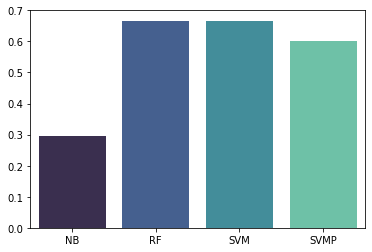

In [126]:
import seaborn
tips = sns.load_dataset("tips")
seaborn.barplot(x,y, palette="mako", data= tips)


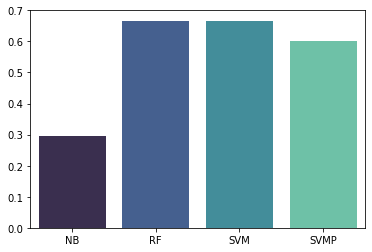

In [132]:
g=seaborn.barplot(x,y, palette="mako", data= tips)
ax=g
#annotate axis = seaborn axis
#for p in ax.patches:
#             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
#                 textcoords='offset points')
#_ = g.set_ylim(0,120) #To make space for the annotations

plt.show(g)